## Reservoir Data Testing to Determine Target Natural Streamflow treating each dam as a sampling point

#### Import Packages

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Extra Dam/Data Info:
Dataset start date: 1928-07-01

Dam Construction Began, Complete:
LGR: 1965, 1975

LGO: 1963, 1970

LM: 1961, 1970

IH: 1956, 1962

Natural streamflow will be taken from datasets between 1928 and 1955 (28 years)

Post: 1990-2018 (28)

#### Import Data

In [108]:
# import Lower Granite data
lower_granite_inflow = pd.read_csv('lowergraniteinflow.csv')
lower_granite_outflow = pd.read_csv('lowergraniteoutflow.csv')
lower_granite_storage = pd.read_csv('lowergranitestorage.csv')
#no lower granite trib data, create all zeroes to pass in
lower_granite_trib = lower_granite_storage.drop('S (unit:cfs)', axis=1)
lower_granite_trib['L (unit:cfs)'] = lower_granite_storage['S (unit:cfs)'].clip(lower=0, upper=0) 
#merge datasets
lower_granite_data = lower_granite_inflow.merge(lower_granite_outflow, how='inner', on=['date'])
lower_granite_data = lower_granite_data.merge(lower_granite_storage, how='inner', on=['date'])
lower_granite_data = lower_granite_data.merge(lower_granite_trib, how='inner', on=['date'])
lower_granite_data['date'] = pd.to_datetime(lower_granite_data['date'])
# display(lower_granite_data)

# import Little Goose data
little_goose_outflow = pd.read_csv('littlegooseoutflow.csv')
little_goose_storage = pd.read_csv('littlegoosestorage.csv')
#NO TRIB DATA FOR LITTLE GOOSE, create all zeros
little_goose_trib = little_goose_storage.drop('S (unit:cfs)', axis=1)
little_goose_trib['L (unit:cfs)'] = little_goose_storage['S (unit:cfs)'].clip(lower=0, upper=0)
#merge datasets
little_goose_data = little_goose_outflow.merge(little_goose_storage, how='inner', on=['date'])
little_goose_data = little_goose_data.merge(little_goose_trib, how='inner', on=['date'])
little_goose_data['date'] = pd.to_datetime(little_goose_data['date'])

# import Lower Monumental data
lower_monumental_outflow = pd.read_csv('lowermonumentaloutflow.csv')
lower_monumental_storage = pd.read_csv('lowermonumentalstorage.csv')
lower_monumental_trib = pd.read_csv('lowermontrib.csv')
lower_monumental_trib['L (unit:cfs)'] = lower_monumental_trib['L (unit:cfs)'].clip(lower=0) #note that some of the tributary data has negative valuse that we remove here
#merge
lower_monumental_data = lower_monumental_outflow.merge(lower_monumental_storage, how='inner', on=['date'])
lower_monumental_data = lower_monumental_data.merge(lower_monumental_trib, how='inner', on=['date'])
lower_monumental_data['date'] = pd.to_datetime(lower_monumental_data['date'])

# import Ice Harbor data
ice_harbor_outflow = pd.read_csv('iceharboroutflow.csv')
ice_harbor_storage = pd.read_csv('iceharborstorage.csv')
ice_harbor_trib = pd.read_csv('iceharbortrib.csv')
ice_harbor_trib['L (unit:cfs)'] = ice_harbor_trib['L (unit:cfs)'].clip(lower=0) #note that some of the tributary data has negative valuse that we remove here
#merge
ice_harbor_data = ice_harbor_outflow.merge(ice_harbor_storage, how='inner', on=['date'])
ice_harbor_data = ice_harbor_data.merge(ice_harbor_trib, how='inner', on=['date'])
ice_harbor_data['date'] = pd.to_datetime(ice_harbor_data['date'])

### Visualize Natural Streamflows

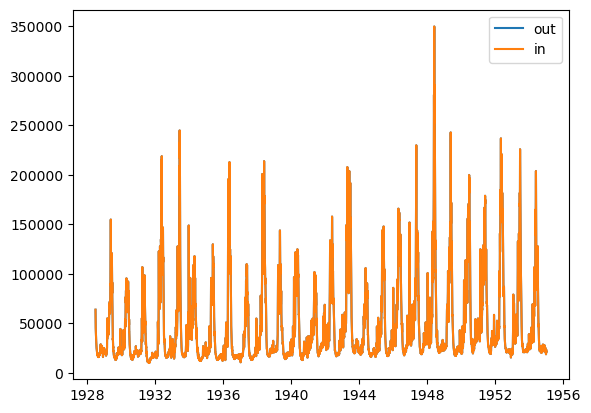

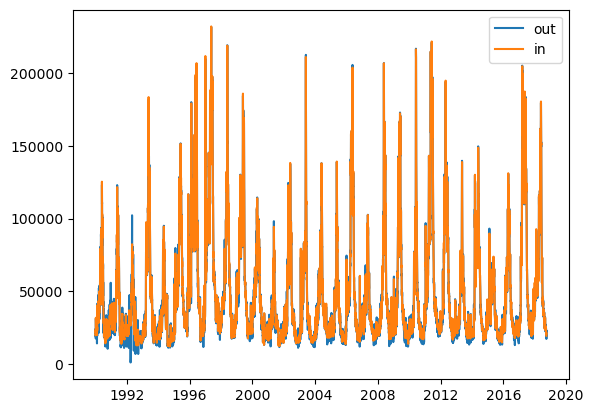

In [109]:
pre_cutoff = datetime(1955,1,1)
lower_granite_pre = lower_granite_data[lower_granite_data['date'] <= pre_cutoff]
# lower_granite_pre_max = lower_granite_pre.groupby(lower_granite_pre['date'].dt.year)['A (unit:cfs)'].max()
# lower_granite_pre_min = lower_granite_pre.groupby(lower_granite_pre['date'].dt.year)['A (unit:cfs)'].min()
plt.plot(lower_granite_pre['date'], lower_granite_pre['H (unit:cfs)'], label = 'out')
plt.plot(lower_granite_pre['date'], lower_granite_pre['A (unit:cfs)'], label = 'in')
plt.legend()
plt.show()

post_cutoff = datetime(1990,1,1)
lower_granite_post = lower_granite_data[lower_granite_data['date'] >= post_cutoff]
# lower_granite_post_max = lower_granite_post.groupby(lower_granite_post['date'].dt.year)['A (unit:cfs)'].max()
# lower_granite_post_min = lower_granite_post.groupby(lower_granite_post['date'].dt.year)['A (unit:cfs)'].min()
plt.plot(lower_granite_post['date'], lower_granite_post['H (unit:cfs)'], label='out')
plt.plot(lower_granite_post['date'], lower_granite_post['A (unit:cfs)'], label='in')
plt.legend()
plt.show()

# plt.figure(figsize=(12,5))

# plt.subplot(1,2,1)
# plt.boxplot([lower_granite_pre_max, lower_granite_post_max], tick_labels=['pre max flow', 'post max flow'])
# plt.title('lower granite boxplots over 90 years: max streamflow')

# plt.subplot(1,2,2)
# plt.boxplot([lower_granite_pre_min, lower_granite_post_min], tick_labels=['pre min flow', 'post min flow'])
# plt.title('min streamflow')

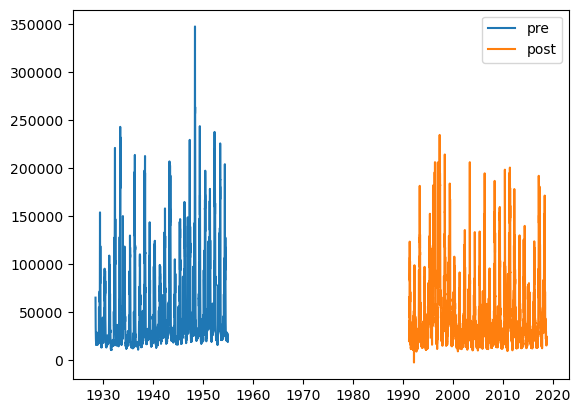

In [110]:
pre_cutoff = datetime(1955,1,1)
little_goose_pre = little_goose_data[little_goose_data['date'] <= pre_cutoff]
plt.plot(little_goose_pre['date'], little_goose_pre['H (unit:cfs)'], label = 'pre')

post_cutoff = datetime(1991,3,31)
little_goose_post = little_goose_data[little_goose_data['date'] >= post_cutoff]
plt.plot(little_goose_post['date'], little_goose_post['H (unit:cfs)'], label='post')
plt.legend()
plt.show()

## Determine Natural Avg Mins

In [111]:
pre_cutoff = datetime(1955,1,1)
min_max = pd.DataFrame({'LGR': [], 'LGO': [], 'LM': [], 'IH': []})
lower_granite_pre = lower_granite_data[lower_granite_data['date'] <= pre_cutoff]
lower_granite_pre_max = lower_granite_pre.groupby(lower_granite_pre['date'].dt.year)['H (unit:cfs)'].max()
lower_granite_pre_min = lower_granite_pre.groupby(lower_granite_pre['date'].dt.year)['H (unit:cfs)'].min()
# display(np.average(lower_granite_pre_max))
min_max['LGR'] = [np.average(lower_granite_pre_min), np.average(lower_granite_pre_max)]

little_goose_pre = little_goose_data[little_goose_data['date'] <= pre_cutoff]
little_goose_pre_max = little_goose_pre.groupby(little_goose_pre['date'].dt.year)['H (unit:cfs)'].max()
little_goose_pre_min = little_goose_pre.groupby(little_goose_pre['date'].dt.year)['H (unit:cfs)'].min()
min_max['LGO'] = [np.average(little_goose_pre_min), np.average(little_goose_pre_max)]

lower_monumental_pre = lower_monumental_data[lower_monumental_data['date'] <= pre_cutoff]
lower_monumental_pre_max = lower_monumental_pre.groupby(lower_monumental_pre['date'].dt.year)['H (unit:cfs)'].max()
lower_monumental_pre_min = lower_monumental_pre.groupby(lower_monumental_pre['date'].dt.year)['H (unit:cfs)'].min()
min_max['LM'] = [np.average(lower_monumental_pre_min), np.average(lower_monumental_pre_max)]

ice_harbor_pre = ice_harbor_data[ice_harbor_data['date'] <= pre_cutoff]
ice_harbor_pre_max = ice_harbor_pre.groupby(ice_harbor_pre['date'].dt.year)['H (unit:cfs)'].max()
ice_harbor_pre_min = ice_harbor_pre.groupby(ice_harbor_pre['date'].dt.year)['H (unit:cfs)'].min()
min_max['IH'] = [np.average(ice_harbor_pre_min), np.average(ice_harbor_pre_max)]

min_max.index = ['min', 'max']
display(min_max)

,LGR,LGO,LM,IH
min,16128.571429,16169.392857,16388.714286,16391.857143
max,168543.500000,168294.750000,169525.357143,169315.642857


## Determine Dam Avg Min Flows

In [112]:
#outflow mins
post_cutoff = datetime(1976,1,1)
post_min_max = pd.DataFrame({'LGR': [], 'LGO': [], 'LM': [], 'IH': []})
lower_granite_post = lower_granite_data[lower_granite_data['date'] >= post_cutoff]
lower_granite_post_max = lower_granite_post.groupby(lower_granite_post['date'].dt.year)['H (unit:cfs)'].max()
lower_granite_post_min = lower_granite_post.groupby(lower_granite_post['date'].dt.year)['H (unit:cfs)'].min()
# display(np.average(lower_granite_post_max))
post_min_max['LGR'] = [np.average(lower_granite_post_min), np.average(lower_granite_post_max)]

little_goose_post = little_goose_data[little_goose_data['date'] >= post_cutoff]
little_goose_post_max = little_goose_post.groupby(little_goose_post['date'].dt.year)['H (unit:cfs)'].max()
little_goose_post_min = little_goose_post.groupby(little_goose_post['date'].dt.year)['H (unit:cfs)'].min()
post_min_max['LGO'] = [np.average(little_goose_post_min), np.average(little_goose_post_max)]

lower_monumental_post = lower_monumental_data[lower_monumental_data['date'] >= post_cutoff]
lower_monumental_post_max = lower_monumental_post.groupby(lower_monumental_post['date'].dt.year)['H (unit:cfs)'].max()
lower_monumental_post_min = lower_monumental_post.groupby(lower_monumental_post['date'].dt.year)['H (unit:cfs)'].min()
post_min_max['LM'] = [np.average(lower_monumental_post_min), np.average(lower_monumental_post_max)]

ice_harbor_post = ice_harbor_data[ice_harbor_data['date'] >= post_cutoff]
ice_harbor_post_max = ice_harbor_post.groupby(ice_harbor_post['date'].dt.year)['H (unit:cfs)'].max()
ice_harbor_post_min = ice_harbor_post.groupby(ice_harbor_post['date'].dt.year)['H (unit:cfs)'].min()
post_min_max['IH'] = [np.average(ice_harbor_post_min), np.average(ice_harbor_post_max)]

post_min_max.index = ['min', 'max']
display(post_min_max)

,LGR,LGO,LM,IH
min,12956.534884,11004.418605,11882.116279,10522.813953
max,159898.279070,155033.139535,158799.279070,158086.953488


### Plot release vs storage

In [113]:
from Reservoir3 import Reservoir

ice_harbor = Reservoir(SA=9200*4047,num_turb=6,capacity=603000,tail_elev=339,pool_elev=446,bottom_elev=310,fish_pass=0.965, area=550_000_000, pc=106_000)
lower_monumental = Reservoir(SA=6590*4047,num_turb=6,capacity=810000,tail_elev=439,pool_elev=548.3,bottom_elev=406,fish_pass=0.965, area=1_610_000_000, pc=130_000)
little_goose = Reservoir(SA=10025*4047,num_turb=6,capacity=903000,tail_elev=539,pool_elev=646.5,bottom_elev=500,fish_pass=0.9775, area=1_175_000_000, pc=130_000)
lower_granite = Reservoir(SA=8900*4047,num_turb=6,capacity=810000,tail_elev=636,pool_elev=746.5,bottom_elev=590,fish_pass=1, area=2_477_000_000, pc=130_000)

In [114]:
# post_cutoff = datetime(1976,1,1)
# lower_granite_post = lower_granite_data[lower_granite_data['date'] >= post_cutoff]
lower_granite_storage = lower_granite.simulate_storage(1, lower_granite_post['S (unit:cfs)'].values,1_650_000_000)
lower_granite_post['Storage (m^3)'] = lower_granite_storage

display(lower_granite_post)

C:\Users\grcra\AppData\Local\Temp\ipykernel_37320\2521467272.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_granite_post['Storage (m^3)'] = lower_granite_storage


,date,A (unit:cfs),H (unit:cfs),S (unit:cfs),L (unit:cfs),Storage (m^3)
17350,1976-01-01,50917,48496,2421,0,1.650000e+09
17351,1976-01-02,50414,52431,-2017,0,1.645068e+09
17352,1976-01-03,47813,49023,-1210,0,1.642110e+09
17353,1976-01-04,49010,50623,-1613,0,1.638166e+09
17354,1976-01-05,49510,47090,2420,0,1.644083e+09
...,...,...,...,...,...,...
32959,2018-09-26,21728,23090,-1363,0,1.667742e+09
32960,2018-09-27,20718,19443,1275,0,1.670859e+09
32961,2018-09-28,20597,22972,-2374,0,1.665054e+09
32962,2018-09-29,20278,17289,2989,0,1.672363e+09


C:\Users\grcra\AppData\Local\Temp\ipykernel_37320\3177090309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_granite_post['H (unit:m^3/d)'] = lower_granite_post['H (unit:cfs)']*.0283*86400


Text(0, 0.5, 'Outflow (m^3/d)')

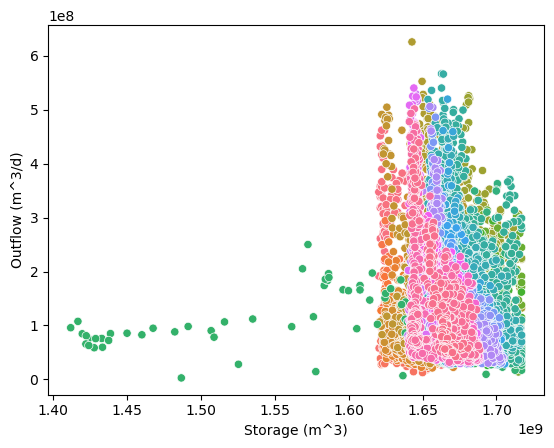

In [115]:
# lower granite
lower_granite_post['H (unit:m^3/d)'] = lower_granite_post['H (unit:cfs)']*.0283*86400
sns.scatterplot(x='Storage (m^3)',y='H (unit:m^3/d)',hue='date',data=lower_granite_post, legend=False)
plt.ylabel('Outflow (m^3/d)')

### Plot Stage/Elevation and Discharge

C:\Users\grcra\AppData\Local\Temp\ipykernel_37320\3258925881.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_granite_post['water_height'] = lower_granite_post['Storage (m^3)']/SA + bottom_elev # m


Text(0, 0.5, 'water height (m)')

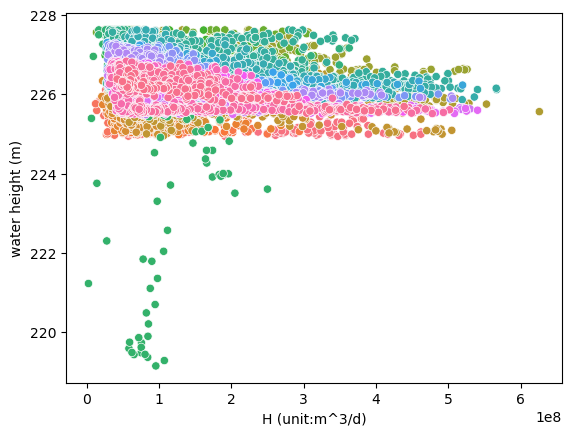

In [116]:
# lower granite
SA = 8900*4047 #m^2
bottom_elev = 590*.305 #meter

lower_granite_post['water_height'] = lower_granite_post['Storage (m^3)']/SA + bottom_elev # m

sns.scatterplot(x='H (unit:m^3/d)',y='water_height',hue='date',data=lower_granite_post, legend=False)
plt.ylabel('water height (m)')